In [1]:
# import packages
import pandas as pd
#import math
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
#from scipy import stats
#import statistics
#import plotly.graph_objects as go
#from scipy.stats import norm
#from plotly.subplots import make_subplots
#from sklearn.neighbors import KernelDensity
#from scipy import optimize

### Theory

*  If the ACF dies oﬀ more or less geometrically with increasing lag number, it is a sign that the series obeys a pure AR process.
*  If the PACF dies oﬀ more or less geometrically with increasing lag number, it is a sign that the series obeys a pure MA process.
* If the ACF drops to zero after a small number of lags q, it is a sign that the series obeys a MA(q) process.
* If the PACF drops to zero after a small number of lags p, it is a sign that the series obeys a AR(p) process.
* If we see no geometric decrease neither in the ACF nor in the PACF, but that there is at least one non zero coeﬃcient, it is a sign that the process has no pure AR or MA.

### Preestimation Analysis on Simulated Data
Simul1 : AR(2) because ACF is geometrically decreasing and PACF drops to zero after 2 lags.

Simul2 : MA(3) because PACF is geometrically decreasing and ACF drops to zero after 3 lags.

### ARMA Representation and Stocks

In [2]:
df = pd.read_excel("/Users/dantoni/HW9/TP9.xls", skiprows = 4)
df.columns = ['Date', 'Microsoft', 'CreditSuisse', 'Boeing', 'CocaCola', 'Nike']
df = df.set_index('Date')
df.head()

,Microsoft,CreditSuisse,Boeing,CocaCola,Nike
Date,,,,,
1992-10-23,5.54,8.38,18.37,20.00,19.37
1992-10-26,5.62,8.50,17.88,20.37,19.31
1992-10-27,5.50,8.50,18.25,20.69,19.22
1992-10-28,5.53,8.38,18.06,20.69,19.37
1992-10-29,5.62,8.50,18.06,20.75,19.34


## 1.

In [3]:
print('Coca Cola :')
sm.graphics.tsa.plot_acf(df.CocaCola);
sm.graphics.tsa.plot_pacf(df.CocaCola);

Coca Cola :


/Users/dantoni/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Credit Suisse :


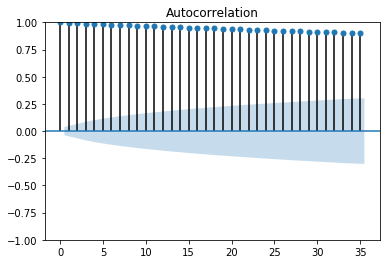

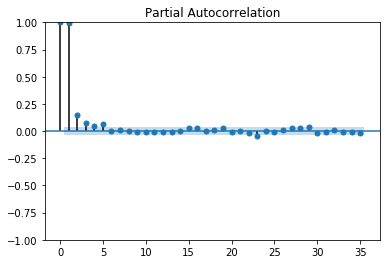

In [4]:
print('Credit Suisse :')
sm.graphics.tsa.plot_acf(df.CreditSuisse);
sm.graphics.tsa.plot_pacf(df.CreditSuisse);

Both processes are not stationary.

## 2.


In [5]:
CS = df['CreditSuisse']
Coca = df['CocaCola']
CS_log_return = np.log(CS[1:len(CS)].values) - np.log(CS[0:(len(CS)-1)].values)
Coca_log_return = np.log(Coca[1:len(Coca)].values) - np.log(Coca[0:(len(Coca)-1)].values)

Coca Cola :


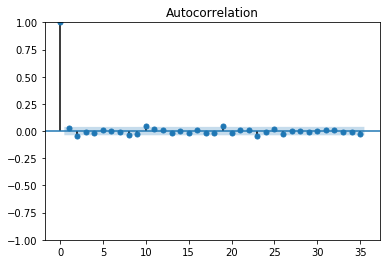

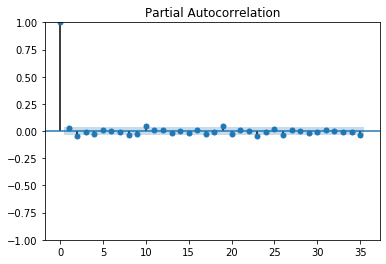

In [6]:
print('Coca Cola :')
sm.graphics.tsa.plot_acf(Coca_log_return);
sm.graphics.tsa.plot_pacf(Coca_log_return);

Credit Suisse :


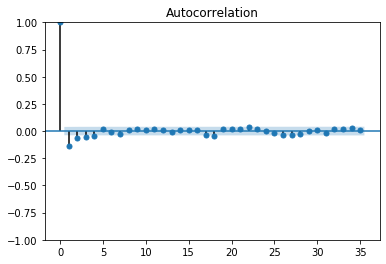

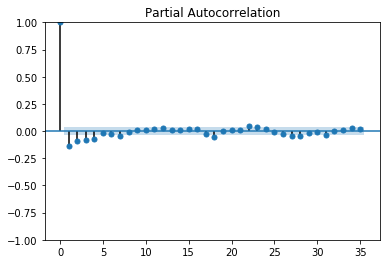

In [7]:
print('Credit Suisse :')
sm.graphics.tsa.plot_acf(CS_log_return);
sm.graphics.tsa.plot_pacf(CS_log_return);

While Coca Cola's log returns do not exibit obvious correlation patterns, Credit Suisse does. Some spikes (wihout looking the first one which is the correlation with itself) are clearly above the confidence interval.

## 3.

In [8]:
print('Coca Cola :')
acorr_ljungbox(Coca_log_return, lags =20, return_df=True)

Coca Cola :


,lb_stat,lb_pvalue
1,2.467339,0.116235
2,7.557230,0.022854
3,7.831999,0.049614
4,9.119977,0.058170
5,9.223100,0.100490
6,9.226487,0.161236
7,9.585704,0.213292
8,12.680771,0.123316
9,14.449347,0.107215
10,19.576752,0.033520


Most of the H0 (no correlation) can not be rejected. Lags 2, 3, 10 and 11 exibit very small patterns of correlation but their p-values are very closed to 5%.

In [9]:
print('Credit Suisse :')
acorr_ljungbox(CS_log_return, lags =20, return_df=True)

Credit Suisse :


,lb_stat,lb_pvalue
1,51.673444,6.554329e-13
2,62.816632,2.288452e-14
3,71.287939,2.261713e-15
4,76.738457,8.543045e-16
5,77.347507,3.009010e-15
6,77.563644,1.137319e-14
7,79.825154,1.495354e-14
8,80.200902,4.454173e-14
9,81.375094,8.612304e-14
10,81.741783,2.285425e-13


H0 is always rejected by far. There is correlation in the returns.

## 4.

In [10]:
# We first did a regression of the log returns with 3 lags, but we add a fourth one since there is a forth spike "clearly" out of the threshold.
# Some other lags are also slightly above but not as much as the first 4, so we don't add them.

independent_vars = np.column_stack((CS_log_return[3:-1], CS_log_return[2:-2], CS_log_return[1:-3],CS_log_return[0:-4]))
X = sm.add_constant(independent_vars)
y = CS_log_return[4:]

reg1 = sm.OLS(endog = y, exog = X, missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     26.43
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.64e-21
Time:                        00:29:29   Log-Likelihood:                 7253.0
No. Observations:                2604   AIC:                        -1.450e+04
Df Residuals:                    2599   BIC:                        -1.447e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -1.491      0.1

All lags are highly significant. They do have an impact on the actual logs return.

Credit Suisse :


/Users/dantoni/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


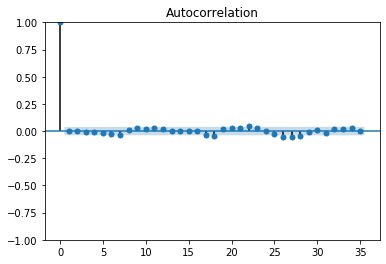

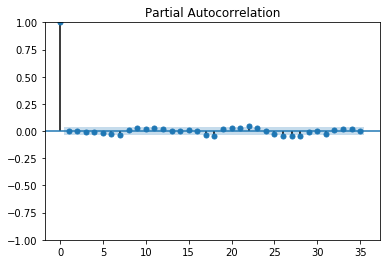

In [11]:
print('Credit Suisse :')
sm.graphics.tsa.plot_acf(results.resid);
sm.graphics.tsa.plot_pacf(results.resid);

In [12]:
print('Credit Suisse :')
acorr_ljungbox(results.resid, lags =20, return_df=True)

Credit Suisse :


,lb_stat,lb_pvalue
1,0.002210,0.962504
2,0.032540,0.983861
3,0.150790,0.985113
4,0.306043,0.989421
5,1.560320,0.906006
6,3.308712,0.769221
7,6.052393,0.533645
8,6.495083,0.591953
9,8.404116,0.493989
10,9.522430,0.483341


Now H0 is never rejected, the residuals are not correlated.